### Madrigal Stats
Mad_Stats.py is the start of statistically analyzing Madrigal TEC EIA results <br>
It works very similar to Swarm_Stats.py, but it is less comprehensive right now <br>



In [4]:
import pandas as pd
from Mad_Stats import states_report_mad,  Mad_LSS_plot

#### Mad_Stats.states_report_mad
Report States for date range for Swarm comparison, <br>
need to make one for Madrigal comparison <br>
<br>
Required Parameters <blockquote>
date_range : pandas daterange <blockquote>
    Date range of desired states files </blockquote>
daily_dir : str <blockquote>
    directory of daily files </blockquote></blockquote>

Key Word Arguemnts <blockquote>
typ: str <blockquote>
    desired type to check against <br>
    for orientation of 'state' <br>
    'eia'(default), 'peak', 'flat', 'trough' <br>
    for orientation of 'direction' <br>
    'north', 'south', 'neither' </blockquote>
mad_lon : int <blockquote>
    starting longitude for Madrigal Daily Files</blockquote></blockquote>

Returns <blockquote>

Ni : DataFrame <blockquote>
    NIMO states, directions, and types <br>
    also includes longitude and local times </blockquote>
Mad : DataFrame <blockquote>
    Madrigal States, direction, and types <br>
    also includes longitude and local times </blockquote></blockquote>

In [9]:
date_range = pd.date_range(start='2014-01-01',  end='2014-01-31')

date_array = date_range.to_pydatetime()
sday = date_array[0]
daily_files = '~/Type_Files/Daily'

NiMad, Mad = states_report_mad(date_range, daily_files, typ='eia', mad_lon=-90)
NiMad

,state,direction,type,GLon,LT,skill
0,peak,neither,peak,-76.0,18.666667,M
1,peak,neither,peak,-72.0,19.000000,C
2,peak,neither,peak,-68.0,19.333333,C
3,peak,south,peak_south,-64.0,19.666667,M
4,eia,south,eia_saddle_peak_south,-56.0,20.000000,F
...,...,...,...,...,...,...
16760,eia,neither,eia_saddle_peak,-76.0,18.416667,F
16761,eia,south,eia_saddle_peak_south,-72.0,18.750000,F
16762,eia,south,eia_saddle_peak_south,-68.0,19.083333,H
16763,eia,south,eia_saddle_peak_south,-64.0,19.416667,F


#### Mad_Stats.Mad_LSS_plot

Plot LSS vs CSI or PC 4 panels (one for each LSS) for 1 model alone <br>
NOTE: LSS is only useful in comparison to another model; therefore, <br>
coin set to True is highly recommended! <br>
<br>

Required Parameters <blockquote>
model1 : dataframe<blockquote>
    model dataframe built by states_report_swarm </blockquote>
eia_type : str<blockquote>
    desired eia type for fig title </blockquote>
date_range : datetime range<blockquote>
    For plotting title purposes </blockquote></blockquote>

Key Word Arguments <blockquote>
model_name : str kwarg<blockquote>
    first model name for labelling purposes</blockquote>
PorC : str kwarg<blockquote>
    Percent correct or Critical success index for x axes</blockquote>
DayNight : bool kwarg<blockquote>
    True (default) if panels should have separate markers for day and night <br>
    otherwise (false) all are plotted together </blockquote>
LT_range : list kwarg<blockquote>
    Range of day night local time, Default is 7 LT to 19 LT for day and <br>
    19 LT to 7 LT for Night </blockquote>
coin : bool kwarg<blockquote>
    If True, coin LSS will be plotted for comparison (default) <br>
    if false, coin LSS will not be plotted </blockquote></blockquote>
    
Returns<blockquote>
fig : fig handle<blockquote>
    4 panel figure (one for each LSS)</blockquote></blockquote>

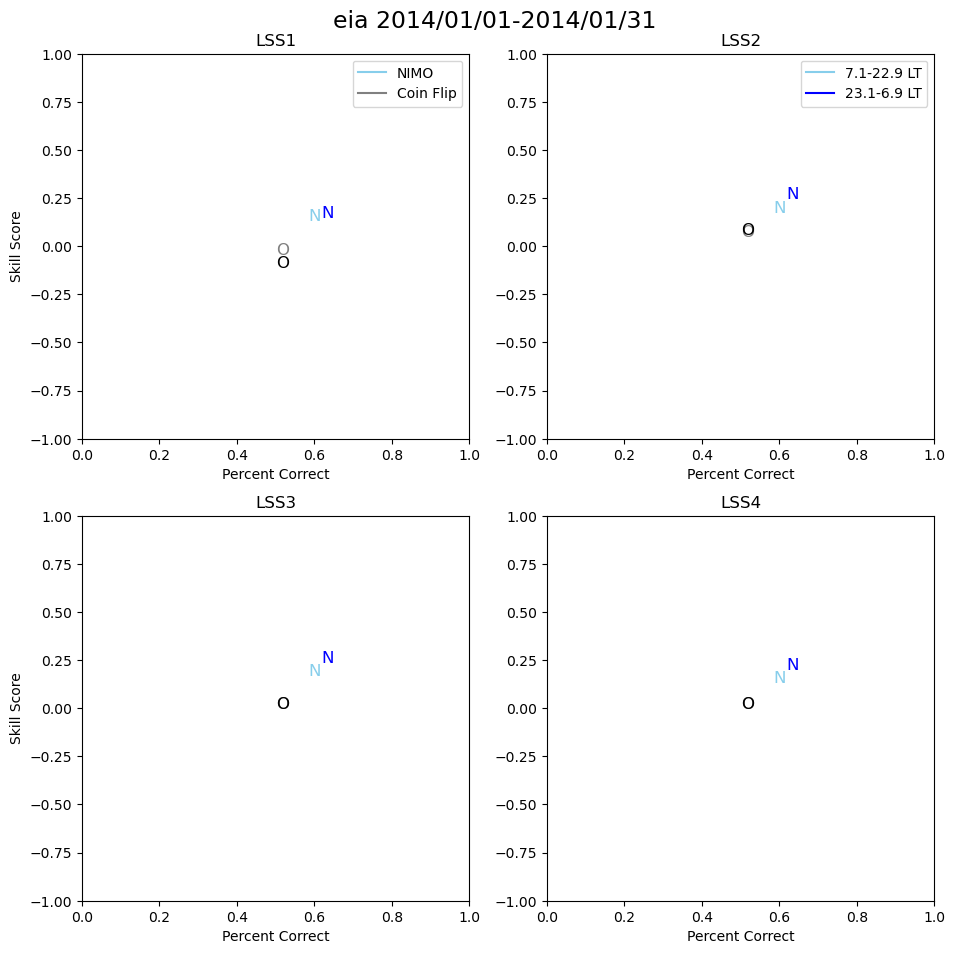

In [10]:
fig = Mad_LSS_plot(NiMad, 'eia', date_range, model_name='NIMO',
                             PorC='PC', DayNight=True, LT_range=[7, 23],
                             coin=True)